<a href="https://colab.research.google.com/github/Mrrobi/Binary-Classification-of-cancer-cell/blob/main/Epithelial%20Tumor%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# All Imports

In [ ]:
import io
import numpy as np
import pandas as pd
import pylab as pl
from scipy import interp
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


# Dataset paths

In [ ]:
# #kazi
# cancer_data = pd.read_csv("/content/drive/My Drive/Capstone/Cancer cell detect dataset/Cancer cell/Cancer_cell_count.csv")
# normal_data = pd.read_csv("/content/drive/My Drive/Capstone/Cancer cell detect dataset/Normal cell/Normal_cell_count.csv")

In [ ]:
#robi
cancer_data = pd.read_csv("/content/drive/My Drive/CapDataSet/GSE81861/tumor_cell.csv")
normal_data = pd.read_csv("/content/drive/My Drive/CapDataSet/GSE81861/normal_cell.csv")

# Common codes for all classifier

In [ ]:
# print(cancer_cell.type)
# print(normal_cell.type)

cancer = cancer_data.T
normal = normal_data.T
cancer['output'] = 1
normal['output'] = 0
cancer = cancer.drop(cancer.index[0])
normal = normal.drop(normal.index[0])
frames = [cancer,normal]
result = pd.concat(frames)
print(result)

                              0  1     2    3  ... 57238 57239 57240 output
RHC4075__stemTA__.2749FE      0  0     0    0  ...     0     0     0      1
RHC5563__stemTA__.2749FE      0  0     0  133  ...     0     0     0      1
RHC5552__stemTA__.2749FE      0  0     0    0  ...     0     0     0      1
RHC4874__stemTA__.2749FE      0  0     0    0  ...     0     0     0      1
RHL2779__stemTA__.2749FE      0  0     0    0  ...     0     0     0      1
...                         ... ..   ...  ...  ...   ...   ...   ...    ...
RHL2864__GobletB__.FEC254     0  0     0    0  ...     0     0     0      0
RHC6060__stemTA__.2749FE      0  0     0    0  ...     0     0     0      0
RHC4286__GobletB__.FEC254     0  0     0    0  ...     0     0     0      0
RHC4110__stemTA__.2749FE   3332  0  1620    0  ...     0     0     0      0
RHC6073__GobletA__.FFFF55   146  0     0   38  ...     0     0     0      0

[432 rows x 57242 columns]


In [ ]:
x = np.asarray(result.iloc[:, 1: -1])
y = np.asarray(result.iloc[ :, -1])
feature_name = list(result.columns.values[:-1])

print(x)
print(x.shape)
print(y)
print(y.shape)

[[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 133.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 1620.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 38.0 ... 0.0 0.0 0.0]]
(432, 57240)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
import keras
from sklearn.utils.multiclass import type_of_target
print(type_of_target(y))

binary


In [ ]:
seed = 40
np.random.seed(seed)

kf = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

# SVC Classifier

for c = 0.7:
Test:
ACCURACY:71.2964
RECALL: 95.1919
Precision: 70.0529
Balanced: 62.9085


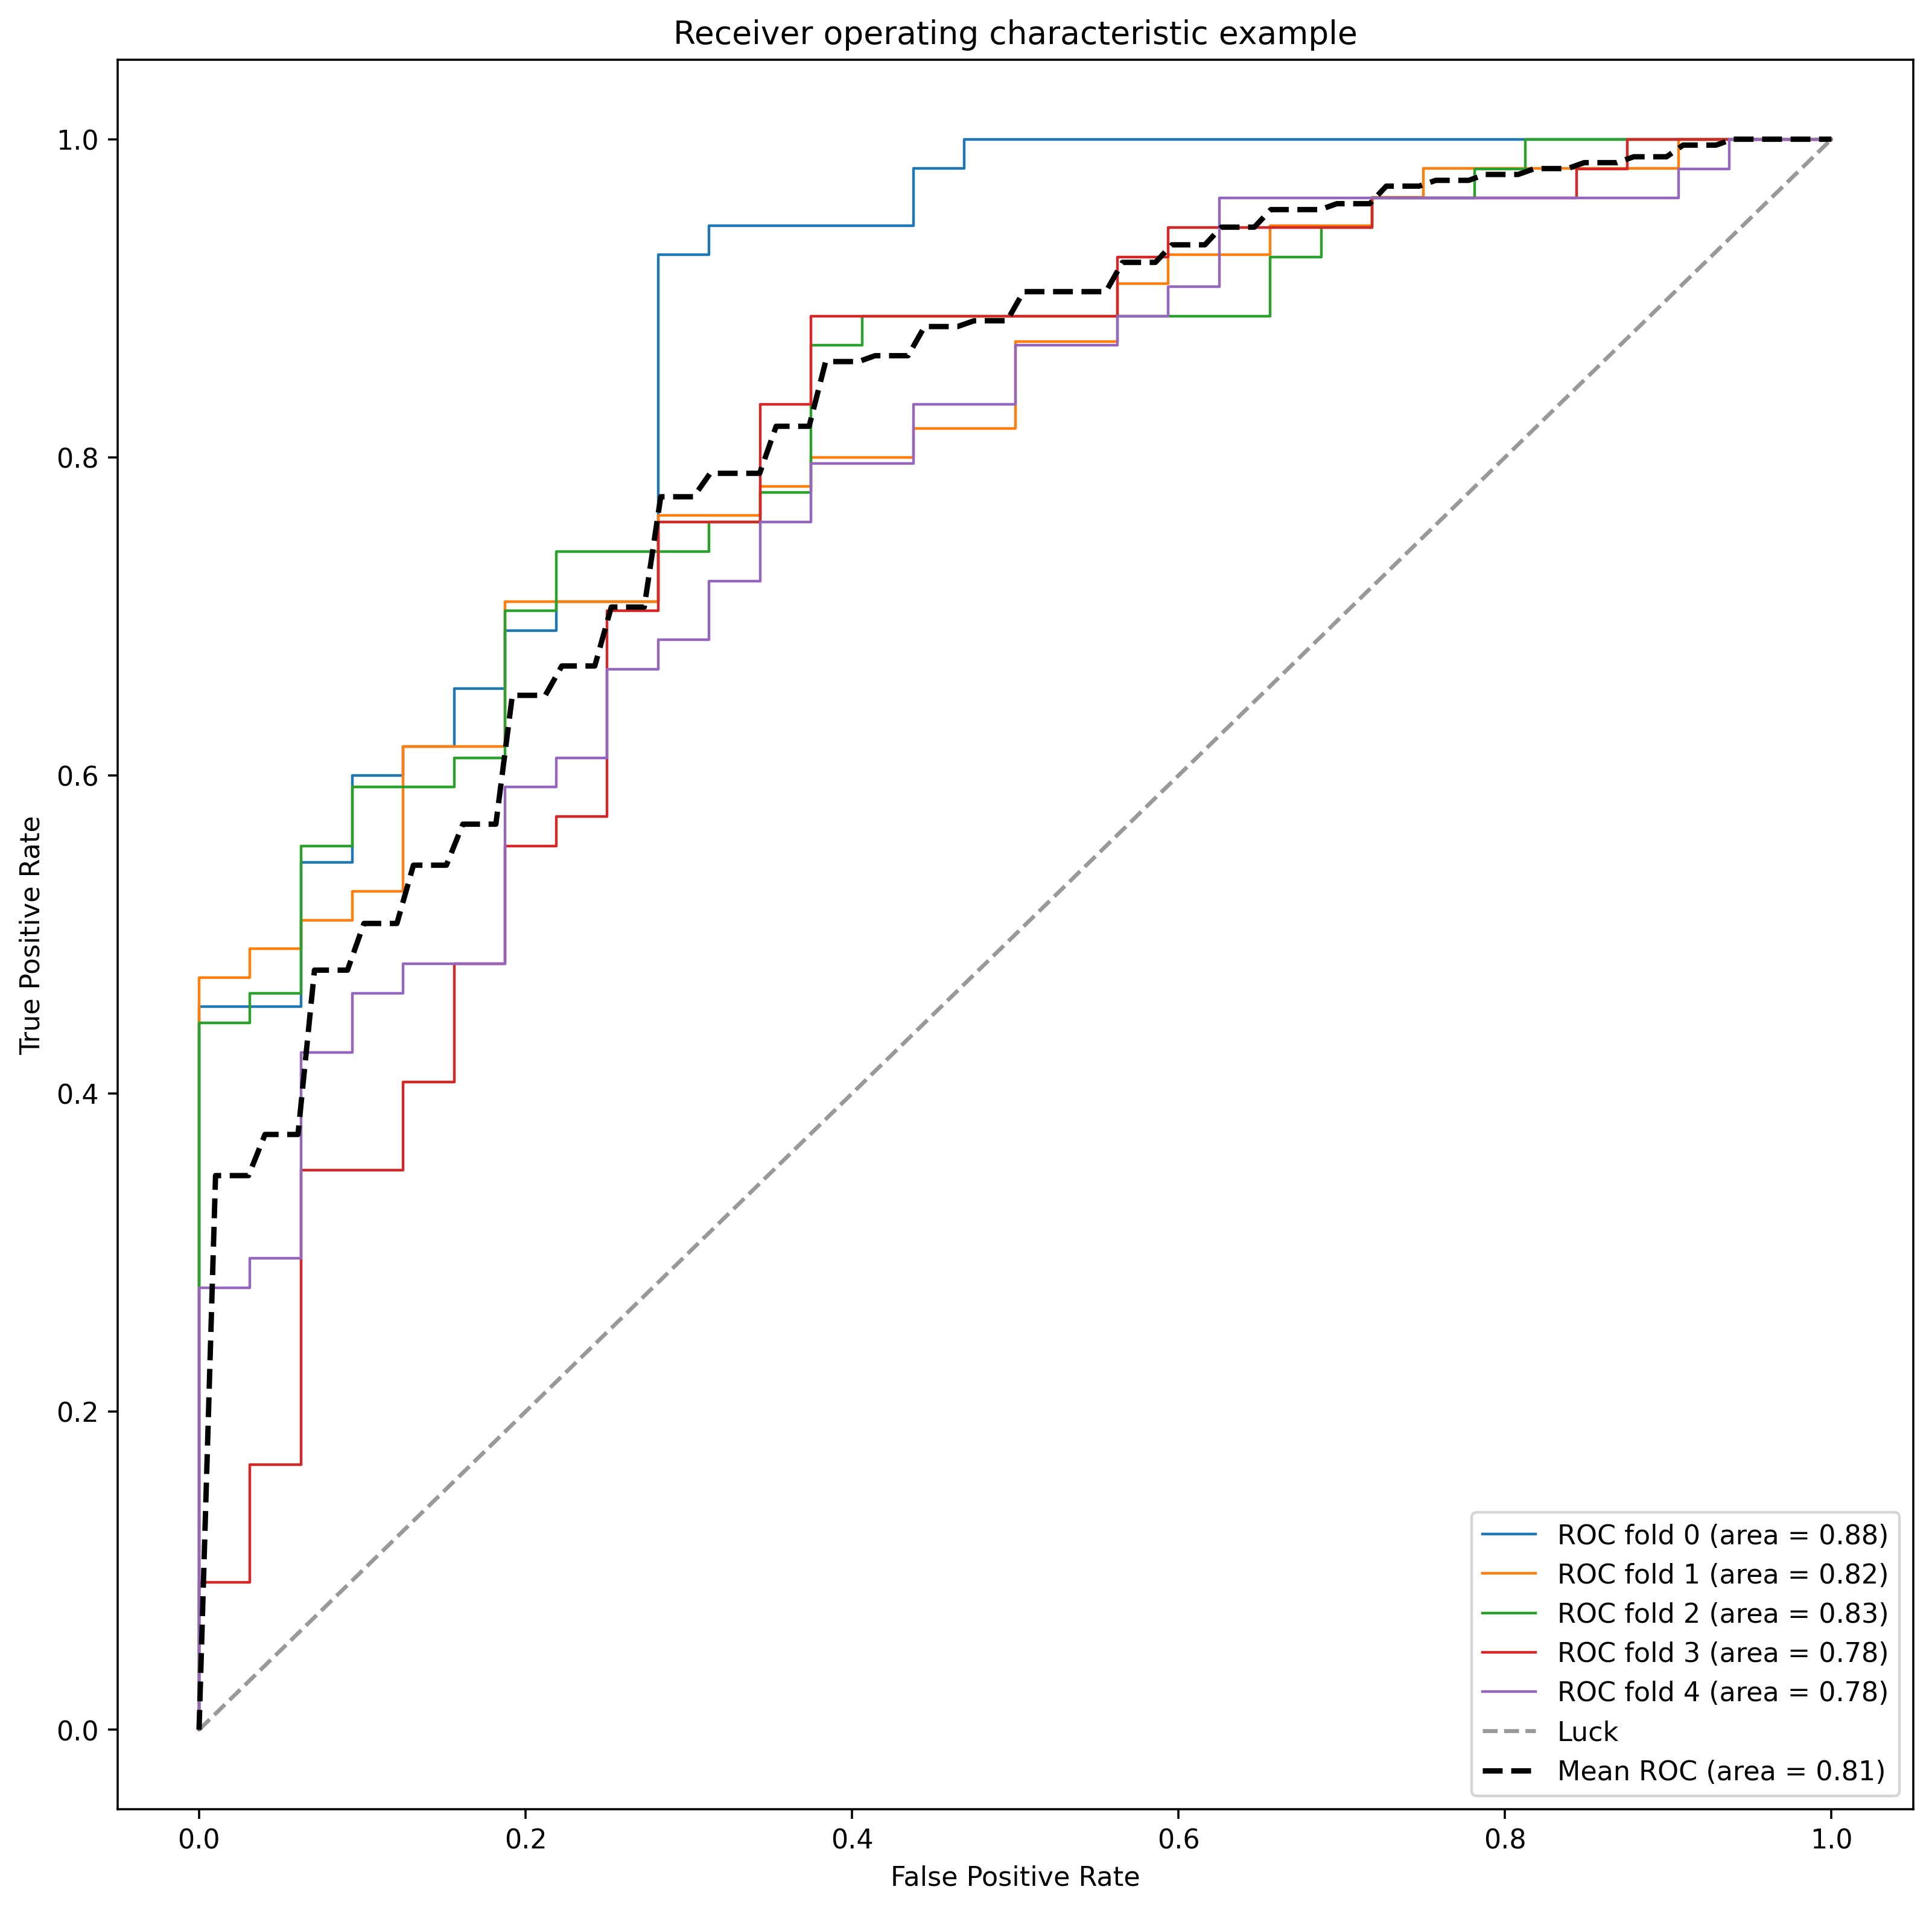

In [ ]:
#Svc 
c = 0.7
test_avg = 0
print(f'for c = {c}:')

clf = SVC(C=c,  random_state = seed, probability=True)
# acc_train = []
# recall_train = []
# pre_train = []
# balance_train = []

acc_test = []
recall_test = []
auROC_test = []
pre_test = []
balance_test = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i = 0
figure(figsize=(12, 12), dpi=320, facecolor='w', edgecolor='k')
for train_index, test_index in kf.split(x,y):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
  mean_tpr += np.interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
  i = i + 1

  y_test_pred = clf.predict(x_test)

  acc_test.append(accuracy_score(y_test, y_test_pred))
  recall_test.append(recall_score(y_test, y_test_pred))
  pre_test.append(precision_score(y_test, y_test_pred))
  balance_test.append(balanced_accuracy_score(y_test, y_test_pred))

  # y_train_pred = clf.predict(x_train)

  # acc_train.append(accuracy_score(y_train, y_train_pred))
  # recall_train.append(recall_score(y_train, y_train_pred))
  # pre_train.append(precision_score(y_train, y_train_pred))
  # balance_train.append(balanced_accuracy_score(y_train, y_train_pred))



# print("train:")
# print("ACCURACY:{0:3.6}".format(np.mean(acc_train)*100))
# print("RECALL: {0:3.6}".format(np.mean(recall_train)*100))
# print("Precision: {0:3.6}".format(np.mean(pre_train)*100))
# print("Balanced: {0:3.6}".format(np.mean(balance_train)*100))

print("Test:")
print("ACCURACY:{0:3.6}".format(np.mean(acc_test)*100))
print("RECALL: {0:3.6}".format(np.mean(recall_test)*100))
print("Precision: {0:3.6}".format(np.mean(pre_test)*100))
print("Balanced: {0:3.6}".format(np.mean(balance_test)*100))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
pl.plot(mean_fpr, mean_tpr, 'k--',
        label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()


# Decision Tree Classifier

Test:
ACCURACY:85.8915
RECALL: 88.9966
Precision: 88.9204
Balanced: 84.8108


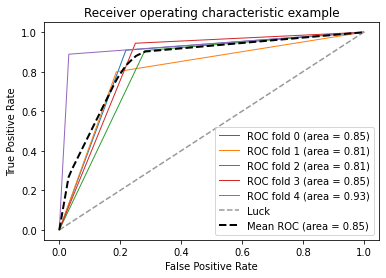

In [ ]:
#Decision Tree

clf = DecisionTreeClassifier()
# acc_train = []
# recall_train = []
# pre_train = []
# balance_train = []

acc_test = []
recall_test = []
auROC_test = []
pre_test = []
balance_test = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i = 0
for train_index, test_index in kf.split(x,y):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
  mean_tpr += np.interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
  i = i + 1

  y_test_pred = clf.predict(x_test)

  acc_test.append(accuracy_score(y_test, y_test_pred))
  recall_test.append(recall_score(y_test, y_test_pred))
  pre_test.append(precision_score(y_test, y_test_pred))
  balance_test.append(balanced_accuracy_score(y_test, y_test_pred))

  # y_train_pred = clf.predict(x_train)

  # acc_train.append(accuracy_score(y_train, y_train_pred))
  # recall_train.append(recall_score(y_train, y_train_pred))
  # pre_train.append(precision_score(y_train, y_train_pred))
  # balance_train.append(balanced_accuracy_score(y_train, y_train_pred))



# print("train:")
# print("ACCURACY:{0:3.6}".format(np.mean(acc_train)*100))
# print("RECALL: {0:3.6}".format(np.mean(recall_train)*100))
# print("Precision: {0:3.6}".format(np.mean(pre_train)*100))
# print("Balanced: {0:3.6}".format(np.mean(balance_train)*100))

print("Test:")
print("ACCURACY:{0:3.6}".format(np.mean(acc_test)*100))
print("RECALL: {0:3.6}".format(np.mean(recall_test)*100))
print("Precision: {0:3.6}".format(np.mean(pre_test)*100))
print("Balanced: {0:3.6}".format(np.mean(balance_test)*100))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
pl.plot(mean_fpr, mean_tpr, 'k--',
        label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

# Random Forest Classifier

Test:
ACCURACY:90.0454
RECALL: 97.798
Precision: 87.7923
Balanced: 87.3365


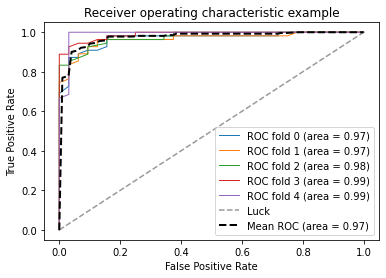

In [ ]:
#Random Forest

clf = RandomForestClassifier()
# acc_train = []
# recall_train = []
# pre_train = []
# balance_train = []

acc_test = []
recall_test = []
auROC_test = []
pre_test = []
balance_test = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i = 0
for train_index, test_index in kf.split(x,y):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
  mean_tpr += np.interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
  i = i + 1

  y_test_pred = clf.predict(x_test)

  acc_test.append(accuracy_score(y_test, y_test_pred))
  recall_test.append(recall_score(y_test, y_test_pred))
  pre_test.append(precision_score(y_test, y_test_pred))
  balance_test.append(balanced_accuracy_score(y_test, y_test_pred))

  # y_train_pred = clf.predict(x_train)

  # acc_train.append(accuracy_score(y_train, y_train_pred))
  # recall_train.append(recall_score(y_train, y_train_pred))
  # pre_train.append(precision_score(y_train, y_train_pred))
  # balance_train.append(balanced_accuracy_score(y_train, y_train_pred))



# print("train:")
# print("ACCURACY:{0:3.6}".format(np.mean(acc_train)*100))
# print("RECALL: {0:3.6}".format(np.mean(recall_train)*100))
# print("Precision: {0:3.6}".format(np.mean(pre_train)*100))
# print("Balanced: {0:3.6}".format(np.mean(balance_train)*100))

print("Test:")
print("ACCURACY:{0:3.6}".format(np.mean(acc_test)*100))
print("RECALL: {0:3.6}".format(np.mean(recall_test)*100))
print("Precision: {0:3.6}".format(np.mean(pre_test)*100))
print("Balanced: {0:3.6}".format(np.mean(balance_test)*100))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
pl.plot(mean_fpr, mean_tpr, 'k--',
        label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

# Adaboost Classifier

Test:
ACCURACY:96.3005
RECALL: 96.33
Precision: 97.77
Balanced: 96.29


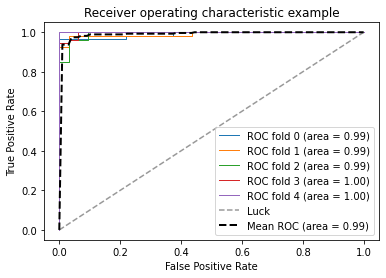

In [ ]:
#Adaboost 

clf = AdaBoostClassifier()
# acc_train = []
# recall_train = []
# pre_train = []
# balance_train = []

acc_test = []
recall_test = []
auROC_test = []
pre_test = []
balance_test = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i = 0
for train_index, test_index in kf.split(x,y):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
  mean_tpr += np.interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
  i = i + 1

  y_test_pred = clf.predict(x_test)

  acc_test.append(accuracy_score(y_test, y_test_pred))
  recall_test.append(recall_score(y_test, y_test_pred))
  pre_test.append(precision_score(y_test, y_test_pred))
  balance_test.append(balanced_accuracy_score(y_test, y_test_pred))

  # y_train_pred = clf.predict(x_train)

  # acc_train.append(accuracy_score(y_train, y_train_pred))
  # recall_train.append(recall_score(y_train, y_train_pred))
  # pre_train.append(precision_score(y_train, y_train_pred))
  # balance_train.append(balanced_accuracy_score(y_train, y_train_pred))



# print("train:")
# print("ACCURACY:{0:3.6}".format(np.mean(acc_train)*100))
# print("RECALL: {0:3.6}".format(np.mean(recall_train)*100))
# print("Precision: {0:3.6}".format(np.mean(pre_train)*100))
# print("Balanced: {0:3.6}".format(np.mean(balance_train)*100))

print("Test:")
print("ACCURACY:{0:3.6}".format(np.mean(acc_test)*100))
print("RECALL: {0:3.6}".format(np.mean(recall_test)*100))
print("Precision: {0:3.6}".format(np.mean(pre_test)*100))
print("Balanced: {0:3.6}".format(np.mean(balance_test)*100))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
pl.plot(mean_fpr, mean_tpr, 'k--',
        label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

# Gaussian Naive Bayes

Test:
ACCURACY:71.0559
RECALL: 87.5084
Precision: 72.4803
Balanced: 65.3167


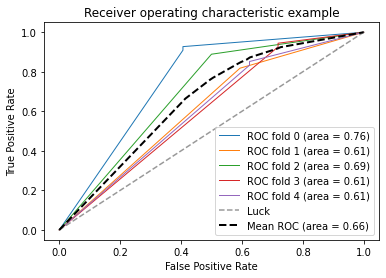

In [ ]:
#Gaussian Naive Bayes

clf = GaussianNB()
# acc_train = []
# recall_train = []
# pre_train = []
# balance_train = []

acc_test = []
recall_test = []
auROC_test = []
pre_test = []
balance_test = []
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
i = 0
for train_index, test_index in kf.split(x,y):

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
  mean_tpr += np.interp(mean_fpr, fpr, tpr)
  mean_tpr[0] = 0.0
  roc_auc = auc(fpr, tpr)
  pl.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
  i = i + 1

  y_test_pred = clf.predict(x_test)

  acc_test.append(accuracy_score(y_test, y_test_pred))
  recall_test.append(recall_score(y_test, y_test_pred))
  pre_test.append(precision_score(y_test, y_test_pred))
  balance_test.append(balanced_accuracy_score(y_test, y_test_pred))

  # y_train_pred = clf.predict(x_train)

  # acc_train.append(accuracy_score(y_train, y_train_pred))
  # recall_train.append(recall_score(y_train, y_train_pred))
  # pre_train.append(precision_score(y_train, y_train_pred))
  # balance_train.append(balanced_accuracy_score(y_train, y_train_pred))



# print("train:")
# print("ACCURACY:{0:3.6}".format(np.mean(acc_train)*100))
# print("RECALL: {0:3.6}".format(np.mean(recall_train)*100))
# print("Precision: {0:3.6}".format(np.mean(pre_train)*100))
# print("Balanced: {0:3.6}".format(np.mean(balance_train)*100))

print("Test:")
print("ACCURACY:{0:3.6}".format(np.mean(acc_test)*100))
print("RECALL: {0:3.6}".format(np.mean(recall_test)*100))
print("Precision: {0:3.6}".format(np.mean(pre_test)*100))
print("Balanced: {0:3.6}".format(np.mean(balance_test)*100))

pl.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
mean_tpr /= 5
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
pl.plot(mean_fpr, mean_tpr, 'k--',
        label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

pl.xlim([-0.05, 1.05])
pl.ylim([-0.05, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

# Other

In [ ]:
model.fit(train_data, train_target)
y_pred = model.predict(test_data)
plot_confusion_matrix(model, test_data, test_target)  
print(classification_report(test_target, y_pred))
print(accuracy_score(test_target, y_pred)*100)
print(recall_score(test_target, y_pred,  average='weighted')*100)
print(precision_score(test_target, y_pred, average='weighted')*100)
print(balanced_accuracy_score(test_target, y_pred)*100)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(train_data, train_target)
      
y_pred = model.predict(test_data)
print("{0}%".format(precision_score(test_target, y_pred, average='weighted')*100))

96.0%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=1000)
model.fit(train_data, train_target)


y_pred = model.predict(test_data)
       
print("Accuracy = {0}%".format(accuracy_score(test_target, y_pred)*100))
print("Recall: {0:3.6}".format(recall_score(test_target, y_pred, average='macro')))

print(classification_report(test_target, y_pred))
plot_confusion_matrix(model, test_data, test_target) 

Accuracy = 97.33333333333334%


In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
model = svm.SVC()
model.fit(train_data, train_target)

y_pred = model.predict(train_data)
print("Accuracy = {0}%".format(accuracy_score(train_target, y_pred)*100))